# Alumno: Gerardo de Miguel González

1.- Crea una función a la que se pase como input: un vector “x” de features distribuidos uniformemente, unos valores “a” y “b” parámetros de un modelo lineal “y = a + b * x”, y parámetros “m” y “n” que nos den la sigma de una distribución gaussiana: “sigma = m + n * x^2”. La función debe devolver una matriz que contenga en la primera columna un vector con el término independiente “y = a + b * x + gauss(0, sigma = m + n * x^2)”, y en la segunda columna la “sigma = m + n * x^2”. Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de cada punto.

In [1]:
#::GMG::Creo la función de muestras con ruido gausiano con sigma variable
muestras <- function(x, a, b, m, n) {   
    sigma <- m + n * x ** 2
    y <- a + b * x + rnorm(x, 0, sigma)
    Y <- cbind(y, sigma)
    return (Y)
}

2.- Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.

In [2]:
#::GMG:: implemento la solución analítica según slide 7 Chapter 6 apuntes pdf en moodle
thetas <- function(x,y, sigma) {
    i <- rep(1, length(y))
    X <- cbind(i,x)
    Cov_y <- sigma^2*diag(x = 1, nrow = length(sigma))
    Theta <- solve(t(X) %*% solve(Cov_y) %*% X) %*% (t(X) %*% solve(Cov_y)) %*% y
    return(Theta)
}

3.- Crea un vector x distribuido uniformemente en [0, 10], y encuentra el mínimo para a = 1, b = 2, m = 0.1 y n = 0.04. Pinta los datos, sus errores y la recta de ajuste. 

In [3]:
#::GMG::Hacemos el experimento reproducible
set.seed(1)

In [4]:
#::GMG::Calculo un vector aleatorio de 100 elementos de 0 a 10
x <- sample(x = seq(from = 0, to = 10, length.out = 100), replace=FALSE)

In [5]:
#::GMG::Genero la matriz de muestras Y, Sigma
Y <- muestras(x = x, a = 1, b = 2, m = 0.1, n = 0.04)

In [6]:
#::GMG::Calculo los thetas MLE de la recta de ajuste
T <- thetas(x = x, y = Y[,1], sigma = Y[,2])

In [7]:
print(T)

      [,1]
i 0.983816
x 2.013640


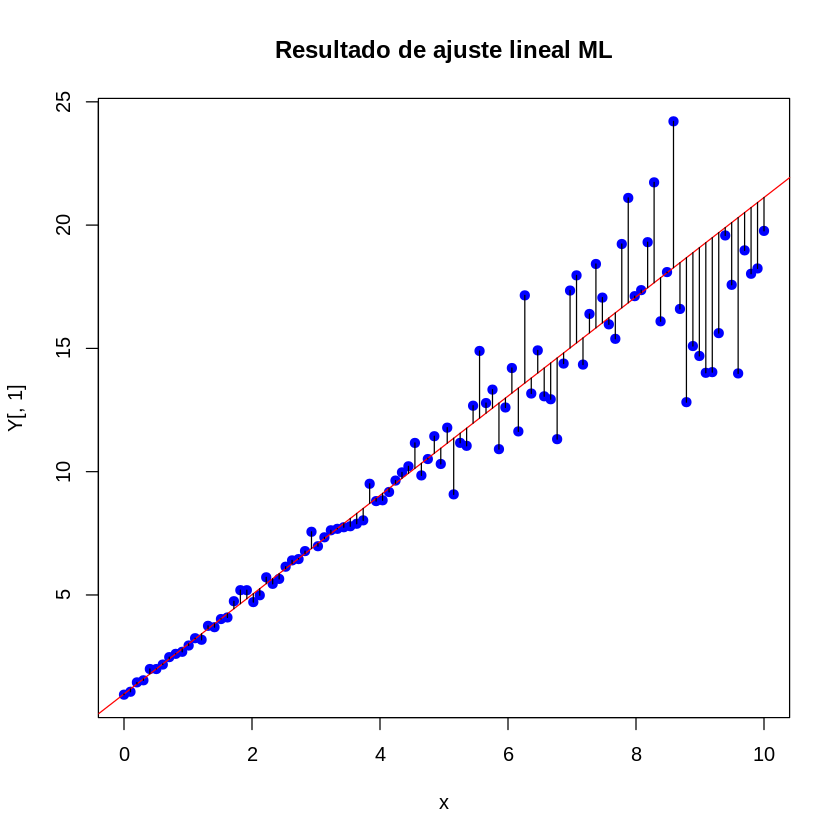

In [8]:
#::GMG::Pinto muestras, errores y recta de ajuste
plot(x, Y[,1], col='blue', pch = 19)
abline(T[1], T[2], col = 'red')
segments(x, T[1] + T[2] * x, x, Y[,1])
title('Resultado de ajuste lineal ML')

4.- Genera un vector con 10000 números distribuidos exponencialmente con un valor de rate = 1/5.27. Crea un histograma con este vector usando como rango [0, 30] y con una anchura de bin = 1.

In [9]:
#::GMG::Hago el experimento reproducible
set.seed(1)

In [10]:
#::GMG::Genero un vector de 10000 números distribuidos exponencialmente
#::DUDA::aquí se puede tomar una distribución exponencial continua ...
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Exponential.html
x_exp <- rexp(n = 10000, rate = 1/5.27)

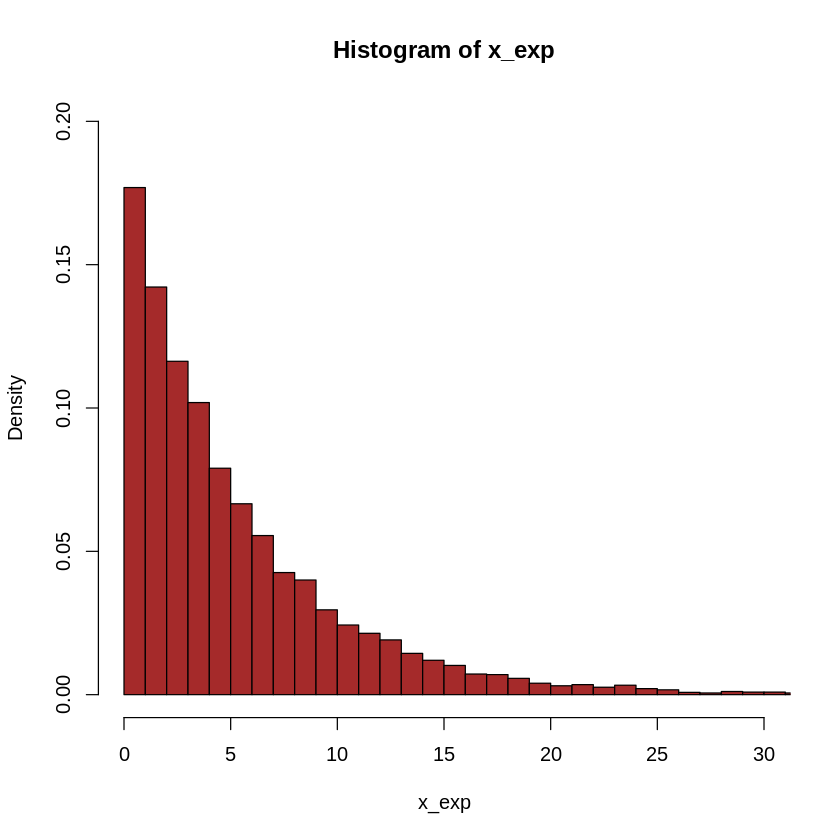

In [11]:
#::GMG::Creo el histograma
h <- hist(x = x_exp, 
     prob = TRUE, 
     xlim = c(0,30), 
     ylim = c(0,0.20),
     breaks = seq(0,100,1),  
     col = 'brown')

5.- Escribe una función que tome como input el valor “N” y “lambda” de una exponencial: “N * exp(-t/rate)”, y calcula el “l” asociado al valor del likelihood para este modelo y este histograma.

In [12]:
#::GMG::función para calcular el valor del likelihood según s11 de apuntes Chapter 6
# l(N, τ;(y_i, x_i))= −∑ log(poisson(nj , N*e^−t/tau))
#::nota::detalle de los valores devueltos en un objeto histograma
# https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/hist.html
LL_h <- function(N, rate) {
    cuenta_por_bin <- h$counts[1:length(h$counts)]
    t <- h$breaks[1:length(h$counts)]
    log_l <- -sum((dpois(x = cuenta_por_bin, 
                     lambda = N * exp(-t/rate), 
                     log = TRUE)))
    return(log_l)
}

6.- Utiliza la función mle para hallar los valores de “N” y “lambda” que maximizan el likelihood. Usa como valores iniciales 4000 y 4. Pinta el histograma y la función exponencial ajustada.  

In [13]:
#::GMG::Para usar mle()
library("stats4")

In [14]:
ajuste <- mle(minuslogl = LL_h, 
              start = list(N = 4000, rate = 4), 
              method = 'BFGS')

In [15]:
summary(ajuste)

Maximum likelihood estimation

Call:
mle(minuslogl = LL_h, start = list(N = 4000, rate = 4), method = "BFGS")

Coefficients:
        Estimate  Std. Error
N    1758.634079 23.89415619
rate    5.229717  0.05246067

-2 log L: 290.7868 

In [16]:
coef(ajuste)

N        rate 
1758.634079    5.229717

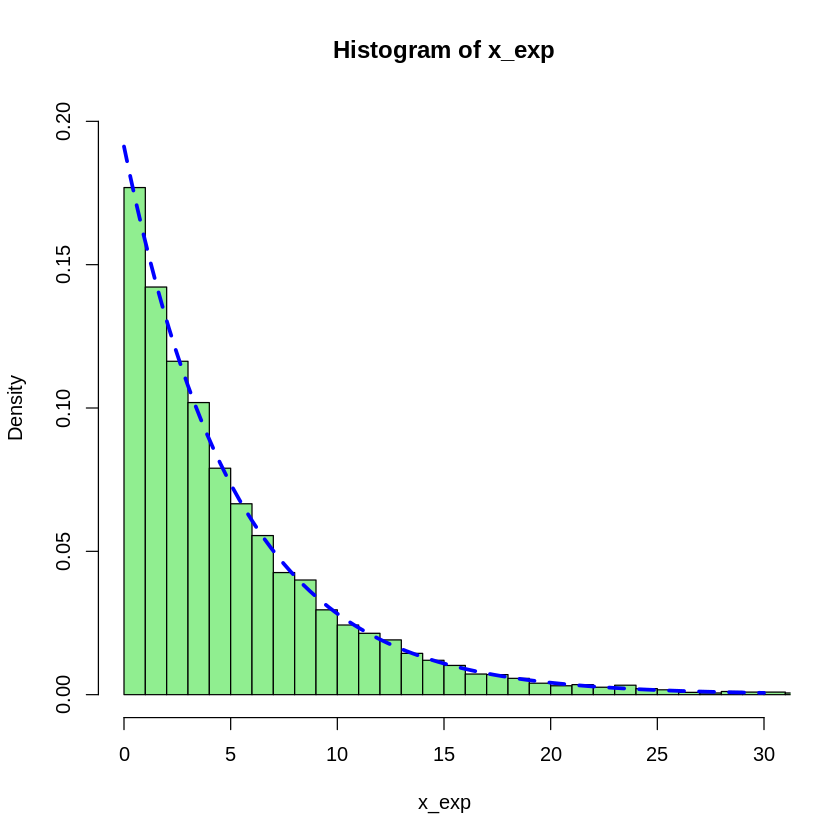

In [17]:
#::GMG::Pinto la gráfica del histograma con su función exponencial ajustada.
h <- hist(x = x_exp, 
     prob = TRUE, 
     xlim = c(0,30), 
     ylim = c(0,0.20),
     breaks = seq(0,100,1),  
     col = 'lightgreen')
curve(dexp(x, rate= 1/coef(ajuste)[2]), 
      col = 'blue', lty = 2, lwd = 3, add = TRUE)